In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("kmeans - kmeans_blobs.csv")

In [3]:
df.head()

,x1,x2
0,24.412,32.932
1,35.190,12.189
2,26.288,41.718
3,0.376,15.506
4,26.116,3.963


In [4]:
df.shape

(60, 2)

In [5]:
df.isnull().sum()

x1    0
x2    0
dtype: int64

In [6]:
def normalize(df):
    n=(df-df.min())/(df.max()-df.min())
    return n

In [7]:
df=normalize(df)
df.head()

,x1,x2
0,0.622452,0.666652
1,0.889776,0.198211
2,0.668982,0.865066
3,0.026291,0.273119
4,0.664716,0.012443


In [8]:
def incen(df, k):
    return df.sample(n=k).to_numpy()

In [9]:
def acl(df,centroids):
    clusters=[]
    for p in df.to_numpy():
        dist=np.linalg.norm(p-centroids,axis=1)
        cluster=np.argmin(dist)
        clusters.append(cluster)
    return np.array(clusters)

In [10]:
def ucn(df,clusters,k):
    means=[]
    for i in range(k):
        clp=df.to_numpy()[clusters==i]
        if len(clp)>0:
            means.append(clp.mean(axis=0))
        else:
            means.append(np.zeros(df.shape[1]))
    return np.array(means)

In [11]:
def k_means(df,k,iters=100, tol=1e-4):
    cen=incen(df,k)
    for i in range(iters):
        cs=acl(df,cen)
        ncen=ucn(df,cs,k)
        if np.linalg.norm(ncen-cen)<tol:
            break
        cen=ncen
    return cs

In [12]:
def plots(df, clusters, k):
    plt.figure(figsize=(6,6))
    for i in range(k):
        plt.scatter(*df.to_numpy()[clusters==i].T,label=f'Cluster {i}')
    plt.xlabel('x1(Norm)')
    plt.ylabel('x2(Norm)')
    plt.title(f'K-Means(k={k})')
    plt.legend()
    plt.show()

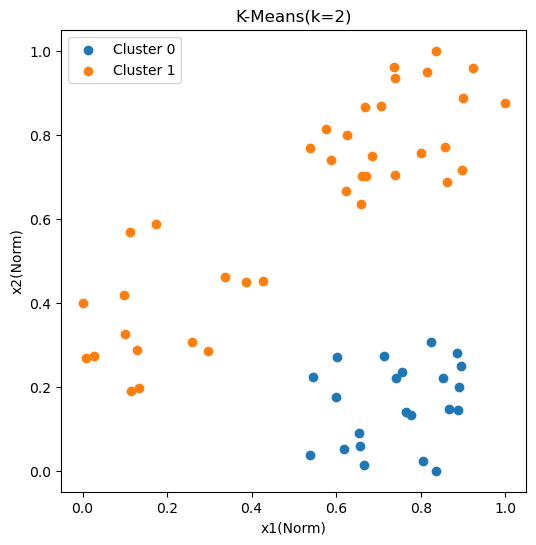

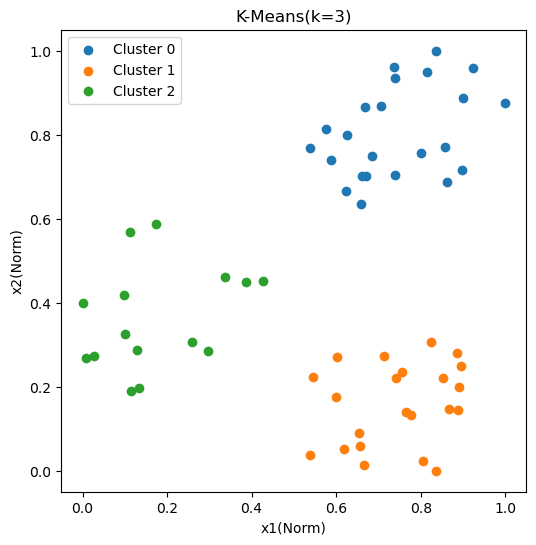

In [13]:
for k in [2,3]:
    cl=k_means(df,k)
    plots(df,cl,k)